# Описательная статистика

Импорт необходимых библиотек

In [1]:
import math

import pandas as pd

pd.options.mode.copy_on_write = True

Чтение данных из файла с созданием структуры *DataFrame*:

In [2]:
df = pd.read_csv("data.txt", delimiter=",", header=None)
df

,0
0,62.205030
1,57.438075
2,59.852134
3,56.268755
4,58.469126
...,...
123,58.991015
124,63.145081
125,58.386862
126,60.965588


Переформатирование данных из структуры *DataFrame* в структуру *Series*:

In [3]:
ds = df[0]
ds

0      62.205030
1      57.438075
2      59.852134
3      56.268755
4      58.469126
         ...    
123    58.991015
124    63.145081
125    58.386862
126    60.965588
127    59.430169
Name: 0, Length: 128, dtype: float64

Построение гистограммы по массиву данных:

<Axes: ylabel='Frequency'>

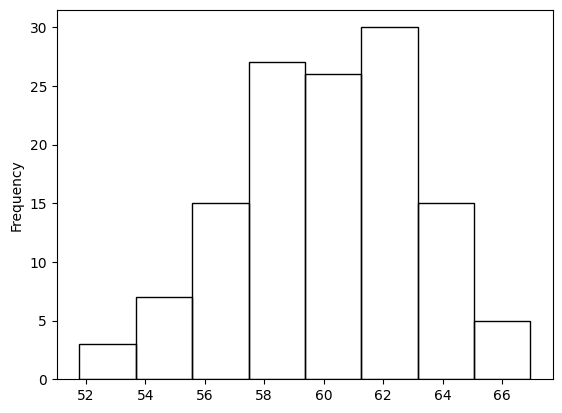

In [4]:
ds.plot.hist(bins=8, fill=None)

Расчет базовых статистик по массиву данных:
* по *Series*:

In [5]:
data_describe = ds.describe()
data_describe

count    128.000000
mean      60.156787
std        2.998086
min       51.789754
25%       58.141365
50%       60.190619
75%       62.241712
max       66.944692
Name: 0, dtype: float64

* по *DataFrame*:

In [6]:
data_describe_df = df.describe()
data_describe_df

,0
count,128.000000
mean,60.156787
std,2.998086
min,51.789754
25%,58.141365
50%,60.190619
75%,62.241712
max,66.944692


Мы можем извлечь из структуры конкретное значение, обратившись к нему по индексам:
* В *DataFrame* (извлечем среднее значение):

In [7]:
data_mean = data_describe_df[0]["mean"]
data_mean

60.15678678539062

Сначала обращаемся к конкретному столбцу (в нашем случае у столбца имя 0) потом к конкретной строке ("mean")


* В *Series* (извлечем минимальное и максимальное значения):

In [8]:
data_describe["min"], data_describe["max"]

(51.78975385, 66.94469194)

В *Series* всего один столбец и сразу обращаемся по требуемому индексу (**"max"** и **"min"**)

***
***

Рассчитаем размах выборки

$$ R = x_{\max} - x_{\min} :$$

In [9]:
r = data_describe["max"] - data_describe["min"]
r

15.154938090000002

И количество интервалов по формуле Стерджеса 

$$ n = 1 + 3.2 \lg(N) $$
(вычисление десятичного логарифма выполняется функцией ```log(a, b)```  стандартного пакета **math**):

In [10]:
n = 1 + 3.2 * math.log(data_describe["count"], 10)
n

7.743071902873178

Рассчитаем оптимальную ширину интервала как отношение этих величин

$$ h = \frac{R}{n} = \frac{x_{\max} - x_{\min}}{1 + 3.2 \lg(N)} : $$

In [11]:
h = r / n
h

1.957225540470126

Чтобы добиться сходимости результатов с первой частью работы, определим в цикле границы интервалов относительно минимального значения выборки $x_{min}$, прибавляя к предыдущей границе интервала ширину $h$ до тех пор пока она не превысит максимальной значение $x_{max}$:

In [12]:
bins = [data_describe["min"]]      # поместим минимльное значение 
                                   # как первую границу в список bins
left_border = data_describe["min"] # определим переменную left_border 
                                   # для хранения значения левой 
                                   # границы интервала
while True:                        # создадим бесконечный цикл
    right_border = left_border + h # определим  и рссчитаем 
                                   # переменную right_border 
                                   # для правой границы интервала
    bins.append(right_border)      # доабавим ее в список bins 
    if right_border <= data_describe["max"]:  # если текущая 
                                   # правая граница интервала 
                                   # меньше максимльного значения:
        left_border = right_border # запишем ее как текущую левую 
                                   # границу и продолжим цикл 
    else:                          # а если нет, то:
        break                      # прервем цикл
bins                               # выведем получившийся список 
                                   # границ интервалов:

[51.78975385,
 53.74697939047012,
 55.70420493094025,
 57.66143047141038,
 59.6186560118805,
 61.57588155235063,
 63.53310709282076,
 65.49033263329088,
 67.447558173761]

Функция ```pd.cut()``` определяет к какому интервалу относится каждое значение серии **ds**.

Передав в переменную **bins** список границ интервалов, мы можем указывать конкретные значения интервалов, создавать разное количество интервалов, выполнять несимметричные разбиения и создавать интервалы неравной ширины.

Мы используем именно такой способ так как в первой части работы правая граница последнего интервала превосходила по значению максимально значение в выборке.

Передав в переменную **bins** целое число мы явно укажем на какое количество равных интервалов мы хотим разбить наш ряд чисел.

***

Используем в качестве разделителся ранее полученный списое границ **bins**:

In [13]:
pd.cut(ds, bins=bins, include_lowest=True, right=False)

0      [61.576, 63.533)
1      [55.704, 57.661)
2      [59.619, 61.576)
3      [55.704, 57.661)
4      [57.661, 59.619)
             ...       
123    [57.661, 59.619)
124    [61.576, 63.533)
125    [57.661, 59.619)
126    [59.619, 61.576)
127    [57.661, 59.619)
Name: 0, Length: 128, dtype: category
Categories (8, interval[float64, left]): [[51.79, 53.747) < [53.747, 55.704) < [55.704, 57.661) < [57.661, 59.619) < [59.619, 61.576) < [61.576, 63.533) < [63.533, 65.49) < [65.49, 67.448)]

дополнительные переменные:
* ```include_lowest=True``` - определяет что минимальное значение $x_{min}$ будет включено в первый интервал;
* ```right=False``` - что правые границы интервалов не включают в себя попавшие на них значения (интервал: $[x_л, x_{пр})$).

При выполнении функции ```pd.cut()``` мы получаем новую структуру *Series*, которая связана с нашей структурой **ds** по числовому индексу

Для примера сгруппируем нашу серию **ds**, исходя из их отношения к конкретному интервалу:

In [14]:
ds.groupby(pd.cut(ds, bins=bins, include_lowest=True, right=False), 
           observed=True).apply(lambda x: x)

[51.79, 53.747)   35     53.371319
                  43     51.789754
                  103    53.632930
[53.747, 55.704)  16     55.211169
                  24     53.954021
                           ...    
[63.533, 65.49)   100    63.974128
                  102    64.558972
[65.49, 67.448)   105    66.594009
                  111    66.944692
                  120    66.449405
Name: 0, Length: 128, dtype: float64

> Синтаксис и внутренняя работа используемой здесь лямбда функции ```lambda x: x``` и ей подобных пока выходит за пределы нашего курса.

Создадим на осове полученной группировки списки значений, относящихся к каждому интервалу:

In [15]:
ds.groupby(pd.cut(ds, bins=bins, include_lowest=True, right=False),
           observed=True).apply(lambda x: x.to_list())

0
[51.79, 53.747)               [53.37131917, 51.78975385, 53.63293046]
[53.747, 55.704)    [55.21116863, 53.95402101, 55.55767829, 55.362...
[55.704, 57.661)    [57.43807465, 56.26875545, 56.97197055, 56.602...
[57.661, 59.619)    [58.46912605, 57.8691089, 57.95635592, 58.1491...
[59.619, 61.576)    [59.85213372, 61.4901492, 60.67183453, 60.2147...
[61.576, 63.533)    [62.20502978, 61.74321686, 63.20743075, 62.273...
[63.533, 65.49)     [65.21124, 64.03160747, 64.89588425, 64.058164...
[65.49, 67.448)               [66.59400892, 66.94469194, 66.44940514]
Name: 0, dtype: object

Посчитаем количество значений в каждом интервале и сохраним полученный результат в промежуточную серию **interval_counter**:

In [16]:
interval_counter = ds.groupby(pd.cut(ds, bins=bins, include_lowest=True, 
                                     right=False), observed=True) \
                     .apply(lambda x: len(x.to_list()))
interval_counter

0
[51.79, 53.747)      3
[53.747, 55.704)     7
[55.704, 57.661)    15
[57.661, 59.619)    32
[59.619, 61.576)    25
[61.576, 63.533)    31
[63.533, 65.49)     12
[65.49, 67.448)      3
Name: 0, dtype: int64

Посчитаем сумму частот $n$:

In [17]:
interval_counter.sum()

128

Рассмотрим подробнее первый индекс полученной серии:

In [18]:
interval_counter.index[0]

Interval(51.79, 53.747, closed='left')

Сам по себе он (как и все остальные индексные интервалы) является сложным объектом со своей структурой и поведением.

> Объктно-ориентированное программирование и работа со сложными объектами пока выходит за пределы нашего курса.

Извлечем из него конкретные значения левой и правой границы:

In [19]:
interval_counter.index[0].left, interval_counter.index[0].right

(51.79, 53.747)

Переберем с помощью ```list comprehension``` в цикле все полученные индексы, создав два списка левых и правых границ интервалов соответственно:

> Изучение синтаксиса ```list comprehension``` пока выходит за пределы нашего курса.

In [20]:
[idx.left for idx in interval_counter.index], \
[idx.right for idx in interval_counter.index]

([51.79, 53.747, 55.704, 57.661, 59.619, 61.576, 63.533, 65.49],
 [53.747, 55.704, 57.661, 59.619, 61.576, 63.533, 65.49, 67.448])

Список значений полученных частот может быть получен проще путем простого приведения серии к списку:

In [21]:
list(interval_counter)

[3, 7, 15, 32, 25, 31, 12, 3]

Обобщим полученные результаты в сводную таблицу **table_1** через структуру *DataFrame*:

In [22]:
table_1 = pd.DataFrame({"x_left": [idx.left for idx 
                                   in interval_counter.index],
                        "x_right": [idx.right for idx 
                                    in interval_counter.index],
                        "n_f": list(interval_counter)})
table_1

,x_left,x_right,n_f
0,51.790,53.747,3
1,53.747,55.704,7
2,55.704,57.661,15
3,57.661,59.619,32
4,59.619,61.576,25
5,61.576,63.533,31
6,63.533,65.490,12
7,65.490,67.448,3


Добавим в эту таблицу новый столбец **"p_f"** (обратившись по несуществующему пока в таблице имени столбца - ```table_1["p_f"]```) и сразу рассчитаем его значения:

In [23]:
table_1["p_f"] = table_1["n_f"] / data_describe["count"]
table_1

,x_left,x_right,n_f,p_f
0,51.790,53.747,3,0.023438
1,53.747,55.704,7,0.054688
2,55.704,57.661,15,0.117188
3,57.661,59.619,32,0.250000
4,59.619,61.576,25,0.195312
5,61.576,63.533,31,0.242188
6,63.533,65.490,12,0.093750
7,65.490,67.448,3,0.023438


Проверим правильность расчетов, определив контрольные суммы по столбцам:

In [24]:
table_1.sum()

x_left     469.120
x_right    484.778
n_f        128.000
p_f          1.000
dtype: float64

Метод ```.sum()``` считает сумму значений по всем столбцам *DataFrame* и выдает в результате новый объект *Series*.

Аналогично создадим столбец **"x_avr"** и посчитаем значения середин интервалов:

In [25]:
table_1["x_avr"] = (table_1["x_right"] + table_1["x_left"]) / 2
table_1

,x_left,x_right,n_f,p_f,x_avr
0,51.790,53.747,3,0.023438,52.7685
1,53.747,55.704,7,0.054688,54.7255
2,55.704,57.661,15,0.117188,56.6825
3,57.661,59.619,32,0.250000,58.6400
4,59.619,61.576,25,0.195312,60.5975
5,61.576,63.533,31,0.242188,62.5545
6,63.533,65.490,12,0.093750,64.5115
7,65.490,67.448,3,0.023438,66.4690


Изменить порядок столбцов или создать подтаблицу можно переопределив таблицу, передав список имен требуемых столбцов в нужном порядке:

In [26]:
table_1 = table_1[["x_left", "x_right", "x_avr", "n_f", "p_f"]]
table_1

,x_left,x_right,x_avr,n_f,p_f
0,51.790,53.747,52.7685,3,0.023438
1,53.747,55.704,54.7255,7,0.054688
2,55.704,57.661,56.6825,15,0.117188
3,57.661,59.619,58.6400,32,0.250000
4,59.619,61.576,60.5975,25,0.195312
5,61.576,63.533,62.5545,31,0.242188
6,63.533,65.490,64.5115,12,0.093750
7,65.490,67.448,66.4690,3,0.023438


Выполним необходимые для вычисления мат. ожидания промежуточные расчеты: 

In [27]:
table_1["n_f * x_avr"] = table_1["n_f"] * table_1["x_avr"]
table_1["p_f * x_avr"] = table_1["p_f"] * table_1["x_avr"]
table_1

,x_left,x_right,x_avr,n_f,p_f,n_f * x_avr,p_f * x_avr
0,51.790,53.747,52.7685,3,0.023438,158.3055,1.236762
1,53.747,55.704,54.7255,7,0.054688,383.0785,2.992801
2,55.704,57.661,56.6825,15,0.117188,850.2375,6.642480
3,57.661,59.619,58.6400,32,0.250000,1876.4800,14.660000
4,59.619,61.576,60.5975,25,0.195312,1514.9375,11.835449
5,61.576,63.533,62.5545,31,0.242188,1939.1895,15.149918
6,63.533,65.490,64.5115,12,0.093750,774.1380,6.047953
7,65.490,67.448,66.4690,3,0.023438,199.4070,1.557867


## Характеристики центра

### Математическое ожидание (expected_value)

Рассчитаем мат. ожидание через частость $$ M(X) = \sum_{i=1}^{N} p_i \cdot \overline{x}:$$

In [28]:
expected_value_1 = table_1.sum()["p_f * x_avr"]
expected_value_1

60.12323046875001

и частоту
    
$$ M(X) = \frac{1}{N} \sum_{i=1}^{N} n_i \cdot \overline{x}:$$

In [29]:
expected_value_2 = table_1.sum()["n_f * x_avr"] / data_describe["count"]
expected_value_2

60.12323046875001

И сравним значения с рассчитанной по полной выборке величиной:

In [30]:
expected_value_3 = data_describe["mean"]
expected_value_3

60.15678678539062

Математическое ожидание можно посчитать напрямую из исходной серии данных, применив к ней метод ```.mean()```:

In [31]:
expected_value_4 = ds.mean()
expected_value_4

60.15678678539062

### Мода (mode)

Рассчитаем моду выборки.

Для этого сначала определим индекс модального интервала (интервала с наибольшей частотой $\max(n_i)$ и частостью $\max(p_i)$).

Метод ```.idxmax()``` позволяет определить индексы строк, содержащие максимальные значения в столбце:

In [32]:
table_1.idxmax()

x_left         7
x_right        7
x_avr          7
n_f            3
p_f            3
n_f * x_avr    5
p_f * x_avr    5
dtype: int64

Используем его для определения индекса модального интервала:

In [33]:
mo_int_idx = table_1.idxmax()["n_f"]
mo_int_idx

3

Рассчитаем моду через частоту во формуле 

$$ Mo(X) = x_{л_{Мо}} + h \cdot \frac{n_{Мо} - n_{Мо - 1}}{(n_{Мо} - n_{Мо - 1}) + (n_{Мо} - n_{Мо + 1})} :$$

In [34]:
mo_x_1 = table_1["x_left"][mo_int_idx] + \
         h * (table_1["n_f"][mo_int_idx] - \
              table_1["n_f"][mo_int_idx - 1]) / \
            ((table_1["n_f"][mo_int_idx] - \
              table_1["n_f"][mo_int_idx - 1]) + \
             (table_1["n_f"][mo_int_idx] - \
              table_1["n_f"][mo_int_idx + 1]))
mo_x_1

59.04736809116634

Проверим результат через частость

$$ Mo(X) = x_{л_{Мо}} + h \cdot \frac{p_{Мо} - p_{Мо - 1}}{(p_{Мо} - p_{Мо - 1}) + (p_{Мо} - p_{Мо + 1})} :$$

In [35]:
mo_x_2 = table_1["x_left"][mo_int_idx] + \
         h * (table_1["p_f"][mo_int_idx] - \
              table_1["p_f"][mo_int_idx - 1]) / \
            ((table_1["p_f"][mo_int_idx] - \
              table_1["p_f"][mo_int_idx - 1]) + \
             (table_1["p_f"][3] - \
              table_1["p_f"][mo_int_idx + 1]))
mo_x_2

59.04736809116634

### Медиана (median)

Для определения медианного интервала рассчитаем накопленные суммы частот (```table_1["n_f"]```) и частостей (```table_1["p_f"]```) через метод ```.cumsum()```:

In [36]:
table_1["n_f_cum"] = table_1["n_f"].cumsum()
table_1["p_f_cum"] = table_1["p_f"].cumsum()
table_1

,x_left,x_right,x_avr,n_f,p_f,n_f * x_avr,p_f * x_avr,n_f_cum,p_f_cum
0,51.790,53.747,52.7685,3,0.023438,158.3055,1.236762,3,0.023438
1,53.747,55.704,54.7255,7,0.054688,383.0785,2.992801,10,0.078125
2,55.704,57.661,56.6825,15,0.117188,850.2375,6.642480,25,0.195312
3,57.661,59.619,58.6400,32,0.250000,1876.4800,14.660000,57,0.445312
4,59.619,61.576,60.5975,25,0.195312,1514.9375,11.835449,82,0.640625
5,61.576,63.533,62.5545,31,0.242188,1939.1895,15.149918,113,0.882812
6,63.533,65.490,64.5115,12,0.093750,774.1380,6.047953,125,0.976562
7,65.490,67.448,66.4690,3,0.023438,199.4070,1.557867,128,1.000000


Для нахождения индекса медианного интервала (интервала первого накопившего частость свыше 0.5) создадим промежуточную серию **temp_tbl** состоящую из разности накопленных частостей ```table_1["p_f_cum"]``` с числом 0.5

In [37]:
temp_tbl = table_1["p_f_cum"] - 0.5
temp_tbl

0   -0.476562
1   -0.421875
2   -0.304688
3   -0.054688
4    0.140625
5    0.382812
6    0.476562
7    0.500000
Name: p_f_cum, dtype: float64

Создадим временный список **mask**, состоящий из булевых значений определяющих положительные и отрицательные значения в серии **temp_tbl**:

In [38]:
mask = temp_tbl > 0
mask

0    False
1    False
2    False
3    False
4     True
5     True
6     True
7     True
Name: p_f_cum, dtype: bool

Отфильтруем по полученной маске **mask** значения в серии **temp_tbl**:

In [39]:
temp_tbl = temp_tbl[mask]
temp_tbl

4    0.140625
5    0.382812
6    0.476562
7    0.500000
Name: p_f_cum, dtype: float64

Аналогично поиску индекса строки с максимальным числом найдем индекс с минимальным (применив парный методу ```.idxmax()``` метод ```.idxmin()```):

In [40]:
mе_int_idx = temp_tbl.idxmin()
mе_int_idx

4

Рассчитаем медиану по нашему ряду через частоту

$$ Me(X) = x_{л_{Me}} + h \cdot \frac{0.5N - \sum n_{Me - 1}}{n_{Me}}: $$

In [41]:
me_x_1 = table_1["x_left"][mе_int_idx] + \
         h * (0.5 * data_describe["count"] - \
              table_1["n_f_cum"][mе_int_idx - 1]) / \
         table_1["n_f"][mе_int_idx]
me_x_1

60.167023151331634

и частость

$$ Me(X) = x_{л_{Me}} + h \cdot \frac{0.5 - \sum p_{Me - 1}}{p_{Me}}: $$

In [42]:
me_x_2 = table_1["x_left"][mе_int_idx] + \
         h * (0.5 - table_1["p_f_cum"][mе_int_idx - 1]) / \
         table_1["p_f"][mе_int_idx]
me_x_2

60.167023151331634

Сравним полученное значение из общего описания данных (наша переменная **data_describe**) по 50% квартилю:

In [43]:
me_x_3 = data_describe["50%"]
me_x_3

60.190618955000005

Или напрямую из исходной серии **ds**, применив к нему метод ```.median()```:

In [44]:
me_x_4 = ds.median()
me_x_4

60.190618955000005

И определим аналогичное значение через наши исходные данные:

Создадим копию наших данных в новую отсортированную серию:

In [45]:
ds_sort = ds.sort_values()
ds_sort

43     51.789754
35     53.371319
103    53.632930
24     53.954021
78     54.167908
         ...    
9      65.211240
63     65.218526
120    66.449405
105    66.594009
111    66.944692
Name: 0, Length: 128, dtype: float64

Обнулим предыдущую индексацию в полученной серии и перепишем переменную **ds_sort**:

In [46]:
ds_sort = ds_sort.reset_index(drop=True)
ds_sort

0      51.789754
1      53.371319
2      53.632930
3      53.954021
4      54.167908
         ...    
123    65.211240
124    65.218526
125    66.449405
126    66.594009
127    66.944692
Name: 0, Length: 128, dtype: float64

Напишем алгоритм вычисления медианы из отсортированного списка учитывающий четность или нечетность чисел в нашей выборке:

In [47]:
count = data_describe["count"]
if count % 2 == 0:
    idx_2 = int(count / 2)
    idx_1 = idx_2 - 1
    me_x_5 = (ds_sort[idx_1] + ds_sort[idx_2]) / 2
else:
    idx = int(count / 2)
    me_x_5 = ds_sort[idx]
me_x_5

60.190618955000005

> Полное изучение синтаксиса логических выражений пока выходит за пределы нашего курса.

## Характеристики рассеивания

Выполним промежуточные рассчеты, необходимые для вычисления центральных моментов первых четырех порядков

$$ \alpha_0^k(X) = M\left((x - M(X))^k\right) = \sum_{i=1}^{n} p_i \cdot (\overline{x}_i - M(X))^k $$:

In [48]:
table_1["p_f * (x_avr - M(X))^1"] = table_1["p_f"] * \
                            (table_1["x_avr"] - expected_value_1)
table_1["p_f * (x_avr - M(X))^2"] = table_1["p_f"] * \
                            (table_1["x_avr"] - expected_value_1) ** 2
table_1["p_f * (x_avr - M(X))^3"] = table_1["p_f"] * \
                            (table_1["x_avr"] - expected_value_1) ** 3
table_1["p_f * (x_avr - M(X))^4"] = table_1["p_f"] * \
                            (table_1["x_avr"] - expected_value_1) ** 4
table_1

,x_left,x_right,x_avr,n_f,p_f,n_f * x_avr,p_f * x_avr,n_f_cum,p_f_cum,p_f * (x_avr - M(X))^1,p_f * (x_avr - M(X))^2,p_f * (x_avr - M(X))^3,p_f * (x_avr - M(X))^4
0,51.790,53.747,52.7685,3,0.023438,158.3055,1.236762,3,0.023438,-0.172376,1.267783,-9.324200,68.576976
1,53.747,55.704,54.7255,7,0.054688,383.0785,2.992801,10,0.078125,-0.295188,1.593347,-8.600459,46.422962
2,55.704,57.661,56.6825,15,0.117188,850.2375,6.642480,25,0.195312,-0.403211,1.387339,-4.773460,16.424188
3,57.661,59.619,58.6400,32,0.250000,1876.4800,14.660000,57,0.445312,-0.370808,0.549993,-0.815767,1.209970
4,59.619,61.576,60.5975,25,0.195312,1514.9375,11.835449,82,0.640625,0.092631,0.043932,0.020836,0.009882
5,61.576,63.533,62.5545,31,0.242188,1939.1895,15.149918,113,0.882812,0.588823,1.431588,3.480575,8.462217
6,63.533,65.490,64.5115,12,0.093750,774.1380,6.047953,125,0.976562,0.411400,1.805335,7.922298,34.765178
7,65.490,67.448,66.4690,3,0.023438,199.4070,1.557867,128,1.000000,0.148729,0.943800,5.989136,38.005676


Найдем сами искомые моменты как сумму значений по соответствующим столбцам:

In [49]:
a0_1 = table_1.sum()["p_f * (x_avr - M(X))^1"]
a0_2 = table_1.sum()["p_f * (x_avr - M(X))^2"]
a0_3 = table_1.sum()["p_f * (x_avr - M(X))^3"]
a0_4 = table_1.sum()["p_f * (x_avr - M(X))^4"]
a0_1, a0_2, a0_3, a0_4

(-8.215650382226158e-15,
 9.023116800399778,
 -6.101040786684045,
 213.87704879274017)

### Дисперсия (variation)

Дисперсия выборки равна центральному моменту второго порядка

$$D(X) = \alpha_0^2(X):$$

In [50]:
variation = a0_2
variation

9.023116800399778

### Среднеквадратическое отклонение (standart deviation)

А среднеквадратическое отклонение - корню из дисперсии

$$ \sigma(X) = \sqrt{D(X)}:$$

In [51]:
std_dev = variation ** 0.5
std_dev

3.0038503292274363

Сравним полученное значение с среднеквадратическим отклонением из общего описания данных (наша переменная **data_describe**):

In [52]:
std_dev_2 = data_describe["std"]
std_dev_2

2.998086414338329

### Ассиметрия (skewness)

Коэффициент ассиметрии может быть найден исходя из выражения

$$ A = \frac{\alpha_0^3(X)}{\sigma(X)^3}:$$

In [53]:
skewness = a0_3 / std_dev ** 3
skewness

-0.22509666448342824

Коффициент ассиметрии может быть также найден из исходной серии данных с помощью метода ```.skew()```:

In [54]:
skewness_ds = ds.skew()
skewness_ds

-0.2103783016788586

СКО коэффициента ассиметрии может быть приближенно оценена как

$$ \sigma_A \approx \sqrt{\frac{6}{N}}: $$

In [55]:
std_dev_of_skewness = (6 / data_describe["count"]) ** 0.5
std_dev_of_skewness

0.21650635094610965

Существенность коэффициента ассиметрии может быть проверена невыполнением неравенства

$$ | A | \leq 3 \cdot \sigma_A: $$

In [56]:
check_skewness = "Ассиметрия несущественна" \
                 if skewness < 3 * std_dev_of_skewness \
                 else "Ассиметрия существенна"
check_skewness

'Ассиметрия несущественна'

### Эксцесс (kurtosis)

Коэффициент эксцесса может быть найден исходя из выражения

$$ Э = \frac{\alpha_0^4(X)}{\sigma(X)^4} - 3 :$$

In [57]:
kurtosis = a0_4 / std_dev ** 4 - 3
kurtosis

-0.37305473161716707

Коффициент эксцесса может быть также найден из исходной серии данных с помощью метода ```.kurt()```:

In [58]:
kurtosis_ds = ds.kurt()
kurtosis_ds

-0.2041510571289673

Аналогично ассиметрии СКО коэффициента эксцесса может быть приближенно оценен как

$$ \sigma_Э \approx \sqrt{\frac{24}{N}}: $$

In [59]:
std_dev_of_kurtosis = (24 / data_describe["count"]) ** 0.5
std_dev_of_kurtosis

0.4330127018922193

Аналогично существенность коэффициента эксцесса может быть проверена невыполнением неравенства

$$ | Э | \leq 3 \cdot \sigma_Э: $$

In [60]:
check_kurtosis = "Эксцесс несуществен" \
                 if skewness < 3 * std_dev_of_kurtosis \
                 else "Эксцесс существен"
check_kurtosis

'Эксцесс несуществен'

Сформируем рассчитанные значения статистик в результирующую серию **result**:

In [61]:
result = pd.Series({"count": data_describe["count"],
                    "M(X)": expected_value_1,
                    "Mo(X)": mo_x_1,
                    "Me(X)": me_x_1,
                    "D(X)": variation,
                    "Std_dev(X)": std_dev,
                    "Skewness": skewness,
                    "Kurtosis": kurtosis,})
result

count         128.000000
M(X)           60.123230
Mo(X)          59.047368
Me(X)          60.167023
D(X)            9.023117
Std_dev(X)      3.003850
Skewness       -0.225097
Kurtosis       -0.373055
dtype: float64

***
***

## Сохранение полученных результатов

Сохраним в файл **result_statistics** формате ```csv``` полученную ранее серию **result**:

In [65]:
result.to_csv("result_statistics.csv", index=True, header=False)

Создадим из *DataFrame* **table_1** заготовку для второй таблицы в *DataFrame* **table_2**:

In [66]:
table_2_df = table_1[["x_left", "x_right", "x_avr", "n_f", "p_f"]]
table_2_df

,x_left,x_right,x_avr,n_f,p_f
0,51.790,53.747,52.7685,3,0.023438
1,53.747,55.704,54.7255,7,0.054688
2,55.704,57.661,56.6825,15,0.117188
3,57.661,59.619,58.6400,32,0.250000
4,59.619,61.576,60.5975,25,0.195312
5,61.576,63.533,62.5545,31,0.242188
6,63.533,65.490,64.5115,12,0.093750
7,65.490,67.448,66.4690,3,0.023438


Сохраним полученный  *DataFrame* в файл **table_2.csv**:

In [67]:
table_2_df.to_csv("table_2.csv", index=True, header=True)